In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cf

In [2]:
df = pd.read_csv('student_climate_scores.csv')
df

,City,Temperature,Humidity,Score
0,Accra,28.8,78.7,28
1,Accra,32.9,64.7,63
2,Accra,35.9,62.9,41
3,Accra,34.9,78.8,56
4,Accra,30.1,82.5,73
...,...,...,...,...
75,Koforidua,27.8,71.2,69
76,Koforidua,29.9,73.9,64
77,Koforidua,35.2,86.4,50
78,Koforidua,28.4,69.3,68


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         80 non-null     object 
 1   Temperature  80 non-null     float64
 2   Humidity     80 non-null     float64
 3   Score        80 non-null     int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 2.6+ KB


In [21]:
df.isnull().sum()

City           0
Temperature    0
Humidity       0
Score          0
dtype: int64

In [5]:
df.describe()

,Temperature,Humidity,Score
count,80.000000,80.000000,80.000000
mean,30.187500,74.086250,60.950000
std,3.501767,8.342293,13.744412
min,24.100000,60.000000,28.000000
25%,27.775000,68.225000,50.750000
50%,30.100000,73.800000,60.500000
75%,32.925000,79.550000,70.250000
max,35.900000,89.800000,86.000000


In [6]:
df['City'].value_counts()

City
Accra         10
Kumasi        10
Tamale        10
Takoradi      10
Ho            10
Sunyani       10
Cape Coast    10
Koforidua     10
Name: count, dtype: int64

In [9]:
df_numeric = df.select_dtypes(include=['number'])
df_numeric

,Temperature,Humidity,Score
0,28.8,78.7,28
1,32.9,64.7,63
2,35.9,62.9,41
3,34.9,78.8,56
4,30.1,82.5,73
...,...,...,...
75,27.8,71.2,69
76,29.9,73.9,64
77,35.2,86.4,50
78,28.4,69.3,68


In [24]:
dfnc = df_numeric.corr()

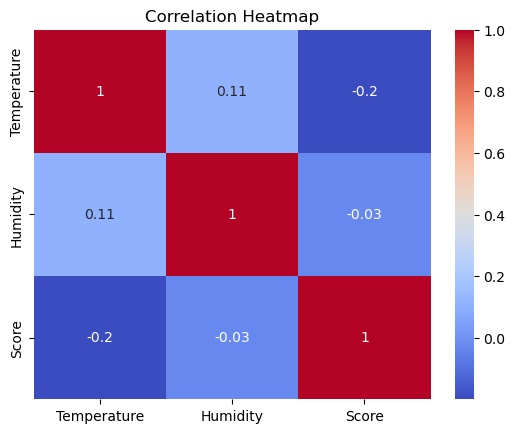

In [26]:
sns.heatmap(dfnc, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

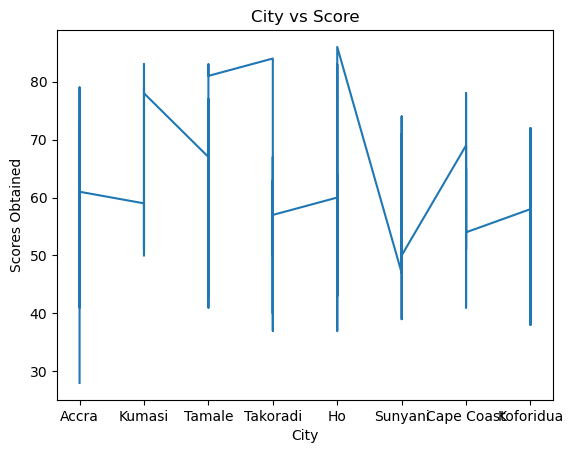

In [11]:
plt.plot(df['City'], df['Score'])
plt.xlabel('City')
plt.ylabel('Scores Obtained')
plt.title('City vs Score')
plt.show()

(array([11.,  8.,  2., 12., 11.,  8., 10.,  6.,  7.,  5.]),
 array([60.  , 62.98, 65.96, 68.94, 71.92, 74.9 , 77.88, 80.86, 83.84,
        86.82, 89.8 ]),
 <BarContainer object of 10 artists>)

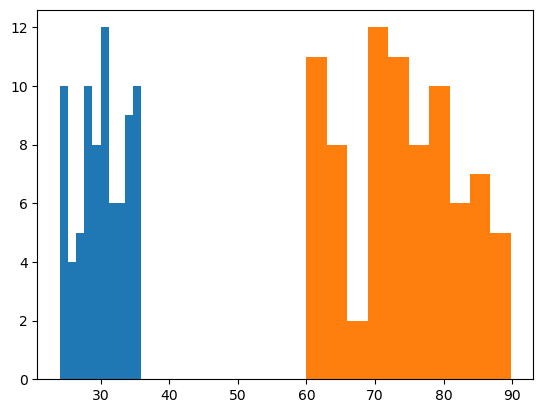

In [12]:
plt.hist(df['Temperature'])
plt.hist(df['Humidity'])

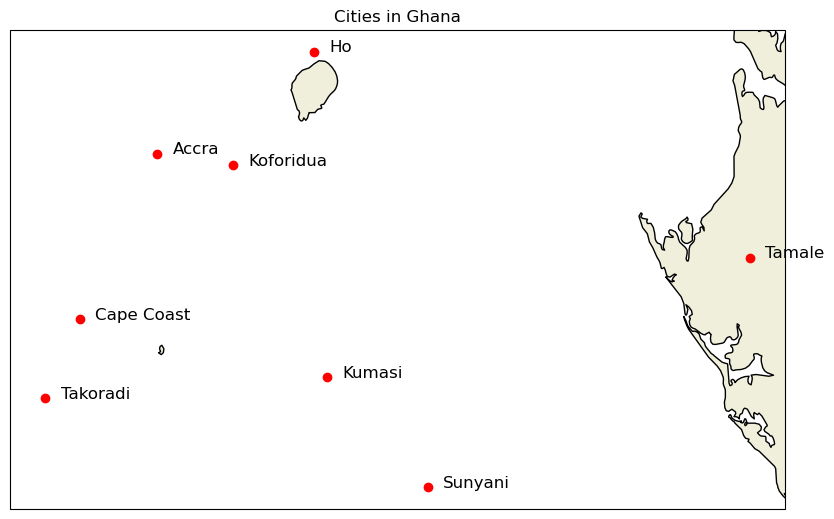

In [13]:
plt.figure(figsize=(10, 10))
ax = plt.axes(projection = ccrs.PlateCarree())
ax.add_feature(cf.BORDERS)
ax.add_feature(cf.LAND)
ax.add_feature(cf.COASTLINE)
city_coordinates = {
    "Accra": (5.6037, -0.1870),
    "Kumasi": (6.6931, -1.6220),
    "Tamale": (9.4070, -0.8539),
    "Takoradi": (4.8845, -1.7554),
    "Ho": (6.6100, 0.4700),
    "Sunyani": (7.3399, -2.3268),
    "Cape Coast": (5.1054, -1.2466),
    "Koforidua": (6.0900, -0.2600)
}

for city, (lon, lat) in city_coordinates.items():
    ax.scatter(lon, lat, marker = 'o', color = 'red')
    ax.text(lon + 0.1, lat, city, fontsize = 12, ha = 'left')
    
plt.title('Cities in Ghana')
plt.show()

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [20]:
X = df[['Temperature', 'Humidity']]
y = df['Score']

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
predicted = model.predict([[31.5, 78]])

print('Coefficient: ', model.coef_)
print('Intercept: ',  model.intercept_)
print('R2_Score: ', r2_score(y, y_pred))
print('The predicted value is: ', predicted)

Coefficient:  [-0.77822865 -0.01396828]
Intercept:  85.47763449546501
R2_Score:  0.03975604972647262
The predicted value is:  [59.87390656]


C:\Users\Lommy\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
